## STEP#0: Import Libraries

In [ ]:
!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt

## STEP #1: Import *Dataset*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sales_df = pd.read_csv('/content/drive/My Drive/SalesData.csv')

In [ ]:
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
sales_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


## STEP #2: Visualization of Dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

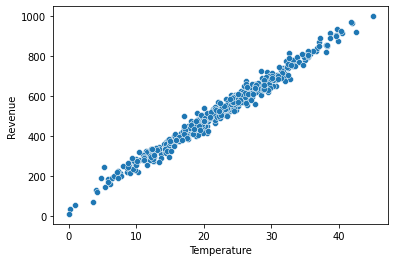

In [ ]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue'])

## STEP #3: Creating Training & Testing Dataset

In [ ]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

## STEP #4: Build & Train the Model

In [ ]:
X_train.shape

(500,)

In [ ]:
y_train.shape

(500,)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units= 1, input_shape = [1]))
#model.add(tf.keras.layers.Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
13/13 [==============================] - 4s 27ms/step - loss: 302906.3438 - val_loss: 325807.1875
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 269719.2188 - val_loss: 289159.4688
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 238681.7344 - val_loss: 255728.2031
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 210599.9219 - val_loss: 225085.0156
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 184763.9375 - val_loss: 197343.2812
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 161740.6562 - val_loss: 172013.2188
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 140490.6875 - val_loss: 149885.8438
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 122047.4297 - val_loss: 129825.2266
Epoch 9/100
13/13 [==============================] - 0s 10ms/step - loss: 105588.8672 - val_loss: 111863.0781
Epoch 10/100
13/1

## STEP #5: Evaluating the Model

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

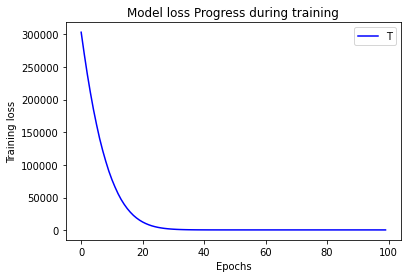

In [ ]:
plt.plot(epochs_hist.history['loss'], color='blue')
plt.title('Model loss Progress during training')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend('Training loss')
plt.show()

Text(0, 0.5, 'Training loss / Validation Loss')

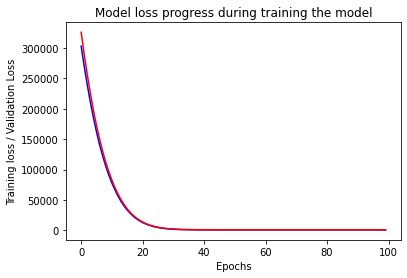

In [ ]:
plt.plot(epochs_hist.history['loss'], color='blue', label='Training loss')
plt.plot(epochs_hist.history['val_loss'], color='red', label='Validation loss')

plt.title('Model loss progress during training the model')
plt.xlabel('Epochs')
plt.ylabel('Training loss / Validation Loss')

In [ ]:
model.get_weights()

[array([[22.212175]], dtype=float32), array([24.958414], dtype=float32)]

In [ ]:
# Use the same model to perform predictions
Temperature = 5
Revenue = model.predict([Temperature])
print('Revenue Prediction using trained ANN=', Revenue)

1/1 [==============================] - 0s 91ms/step
Revenue Prediction using trained ANN= [[136.01929]]


16/16 [==============================] - 0s 2ms/step


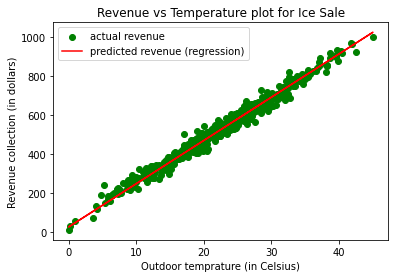

In [ ]:
plt.scatter(X_train, y_train, color = 'g', label = 'actual revenue')
plt.plot(X_train, model.predict(X_train), color = 'r', label = 'predicted revenue (regression)')
plt.ylabel("Revenue collection (in dollars)")
plt.xlabel("Outdoor temprature (in Celsius)")
plt.title("Revenue vs Temperature plot for Ice Sale")
plt.legend()
plt.show()

## STEP #6 Confirming the model using Regression Kit in Scikit learn! 

In [ ]:
# making dataset in batch

X_train = X_train.values.reshape(-1,1)

In [ ]:
X_train.shape

(500, 1)

In [ ]:
y_train = y_train.values.reshape(-1,1)

In [ ]:
y_train.shape

(500, 1)

In [ ]:
from sklearn.linear_model import  LinearRegression

In [ ]:
regressor = LinearRegression(fit_intercept= True) # asking LinearRegression to return the slope along with the Y-intercept
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_) 

Linear Model Coeff(m) [[21.44362551]]
Linear Model Coeff(b) [44.83126709]


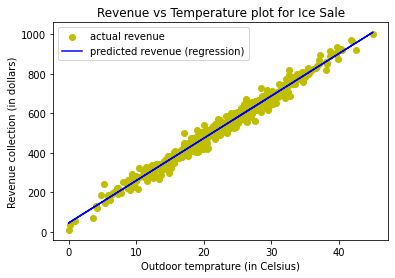

In [ ]:
plt.scatter(X_train, y_train, color = 'y', label = 'actual revenue')
plt.plot(X_train, regressor.predict(X_train), color = 'b', label = 'predicted revenue (regression)')
plt.ylabel("Revenue collection (in dollars)")
plt.xlabel("Outdoor temprature (in Celsius)")
plt.title("Revenue vs Temperature plot for Ice Sale")
plt.legend()
plt.show()

In [ ]:
# Use the same model to perform predictions
Temperature = [5]
Revenue = regressor.predict([Temperature])
print('Revenue Prediction using regressor model=', Revenue)

Revenue Prediction using regressor model= [[152.04939464]]
